In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import the experiments.csv file into a pandas dataframe
df_experiments = pd.read_csv('experiments.csv', delimiter=';')

# Remove the timeouts and change them in the dataframe to 3600
df_experiments['TIME'] = df_experiments['TIME'].replace('timeout', 3601)
df_experiments['N_NODES'] = df_experiments['N_NODES'].replace('timeout', 50000000)
df_experiments['N_EDGES'] = df_experiments['N_EDGES'].replace('timeout', 50000000)
df_experiments['NUM_PRODUCTS'] = df_experiments['NUM_PRODUCTS'].replace('timeout', -1)

# For each model, calculate the average TIME, N_NODES and N_EDGES, grouping by AND_THRESHOLD
df_experiments['AND_OPTIMIZATION'] = df_experiments['AND_OPTIMIZATION'].astype(int)
df_experiments['TIME'] = df_experiments['TIME'].astype(float)
df_experiments['N_NODES'] = df_experiments['N_NODES'].astype(float)
df_experiments['N_EDGES'] = df_experiments['N_EDGES'].astype(float)
df_experiments['NUM_PRODUCTS'] = df_experiments['NUM_PRODUCTS'].astype('double')
df_experiments['AND_THRESHOLD'] = df_experiments['AND_THRESHOLD'].astype(int)
df_experiments['REORDER_VARIABLES'] = df_experiments['REORDER_VARIABLES'].astype(str)
df_experiments['REORDER_VARIABLES'] = df_experiments['REORDER_VARIABLES'].replace('1', 'ON')
df_experiments['REORDER_VARIABLES'] = df_experiments['REORDER_VARIABLES'].replace('0', 'OFF')

df_experiments_no_timeout = df_experiments[df_experiments['TIME'] < 3600]

res = df_experiments.groupby(['PATH', 'REORDER_VARIABLES']).mean().reset_index()
res.drop(columns=['PATH'], inplace=True)

res_no_timeout = df_experiments_no_timeout.groupby(['PATH', 'REORDER_VARIABLES']).mean().reset_index()
res_no_timeout.drop(columns=['PATH'], inplace=True)

# Merge the two dataset res and res_no_timeout and adds a column that for res is always No and for res_no_timeout is Yes
res_no_timeout['TIMEOUT'] = 'No timeout'
res['TIMEOUT'] = 'With timeout'
res = pd.concat([res, res_no_timeout])

# Print the maximum time
print(df_experiments['TIME'].max())

3601.0


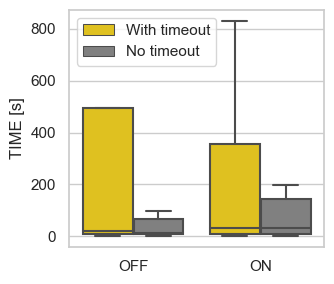

In [22]:
# Plot the TIME
sns.set(style="whitegrid")
plt.figure(figsize=(3.5, 3))
my_pal = {"With timeout": "gold", "No timeout": "gray"}
ax = sns.boxplot(x='REORDER_VARIABLES', y='TIME', data=res, hue='TIMEOUT', showfliers=False, palette=my_pal)
ax.set(xlabel='', ylabel='TIME [s]')
ax.legend()

plt.tight_layout()
plt.savefig('images/RQ2_time.pdf')

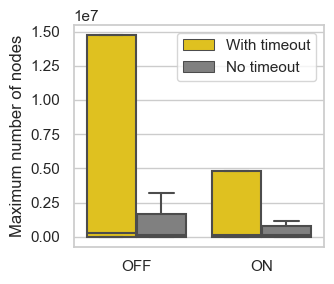

In [23]:
# Plot the N_NODES
sns.set(style="whitegrid")
plt.figure(figsize=(3.5, 3))
ax = sns.boxplot(x='REORDER_VARIABLES', y='N_NODES', data=res, hue='TIMEOUT', showfliers=False, palette=my_pal)
ax.set(xlabel='', ylabel='Maximum number of nodes')
ax.legend()

plt.tight_layout()
plt.savefig('images/RQ2_nodes.pdf')

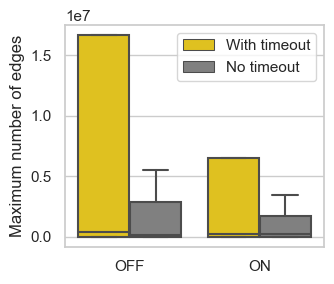

In [24]:
# Plot the N_EDGES
sns.set(style="whitegrid")
plt.figure(figsize=(3.5, 3))
ax = sns.boxplot(x='REORDER_VARIABLES', y='N_EDGES', data=res, hue='TIMEOUT', showfliers=False, palette=my_pal)
ax.set(xlabel='', ylabel='Maximum number of edges')
ax.legend()

plt.tight_layout()
plt.savefig('images/RQ2_edges.pdf')